# Loading Imgs with lables and performing some preprocessing

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import os

DIRECTORY = r"Dataset"
CATEGORIES = ["mask_weared_incorrect","with_mask", "without_mask"]

print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
#         scalling img from 0 to 1
        image = preprocess_input(image)
#     print(image)
        data.append(image)
        labels.append(category)
        
print('Images Uploaded......')

[INFO] loading images...
Images Uploaded......


# Setting usage of GPU at 50 percent

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\muham\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [10]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [11]:
data

array([[[[ 0.8509804 ,  0.64705884,  0.37254906],
         [ 0.8509804 ,  0.64705884,  0.37254906],
         [ 0.84313726,  0.6313726 ,  0.37254906],
         ...,
         [-0.7019608 , -0.70980394, -0.7176471 ],
         [-0.69411767, -0.7019608 , -0.70980394],
         [-0.69411767, -0.7019608 , -0.70980394]],

        [[ 0.8509804 ,  0.64705884,  0.37254906],
         [ 0.8509804 ,  0.64705884,  0.37254906],
         [ 0.84313726,  0.6313726 ,  0.37254906],
         ...,
         [-0.7019608 , -0.70980394, -0.7176471 ],
         [-0.69411767, -0.7019608 , -0.70980394],
         [-0.69411767, -0.7019608 , -0.70980394]],

        [[ 0.90588236,  0.7176471 ,  0.4431373 ],
         [ 0.90588236,  0.7176471 ,  0.4431373 ],
         [ 0.90588236,  0.73333335,  0.47450984],
         ...,
         [-0.7176471 , -0.7176471 , -0.73333335],
         [-0.7176471 , -0.7254902 , -0.73333335],
         [-0.7176471 , -0.7254902 , -0.73333335]],

        ...,

        [[-0.29411763, -0.30196077, -0

# Perform one-hot encoding on the labels and data

In [7]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
# labels = to_categorical(labels)
data = np.array(data, dtype="float32")
labels = np.array(labels)

# Checking for imgs with there classes

In [18]:
lb.classes_

array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype='<U21')

In [19]:
labels

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [20]:
data.shape

(8982, 224, 224, 3)

In [21]:
labels.shape

(8982, 3)

In [22]:
labels.shape

(8982, 3)

# Splitting the data to train and test

In [23]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

In [25]:
trainX.shape

(7185, 224, 224, 3)

In [26]:
trainY.shape

(7185, 3)

In [27]:
len(trainX)

7185

In [28]:
len(trainY)

7185

# Plotting the imgs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


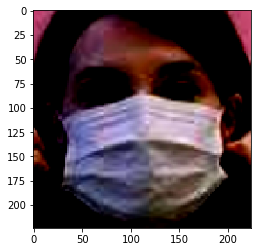

In [29]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])

# Construct the training image generator for data augmentation

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest"
)

In [32]:
augumentedTrain=aug.flow(trainX,trainY)

In [33]:
augumentedTest=aug.flow(testX,testY)

In [34]:
# aug.fit(trainX)
# # fits the model on batches with real-time data augmentation:
# generated_imgs=aug.flow(trainX,trainY)

In [35]:
trainX.shape

(7185, 224, 224, 3)

In [36]:
trainY.shape

(7185, 3)

In [37]:
testX.shape

(1797, 224, 224, 3)

In [38]:
testY.shape

(1797, 3)

# Plotting augumented data

In [48]:
import matplotlib.pyplot as plt
def plot(imag):
    fig,axes=plt.subplots(1,20,figsize=(30,20))
    axes=axes.flatten()
    for im,ax in zip(imag,axes):
        ax.imshow(im)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [53]:
g,l=next(augumentedTest)

In [54]:
l

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

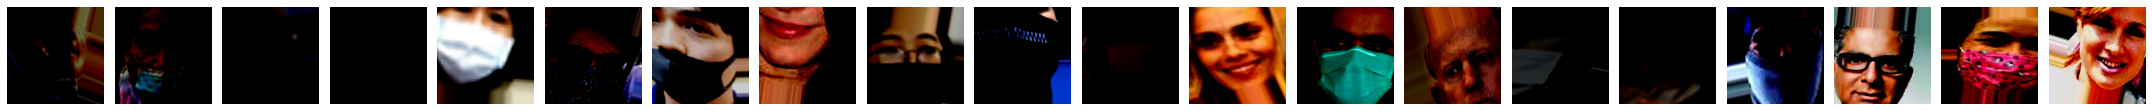

In [55]:
plot(g)

In [56]:
trainX[0].shape

(224, 224, 3)

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

# loop over all layers in the base model and freeze them so they will not be updated during the first training process

In [2]:
for layer in baseModel.layers:
    layer.trainable = False

In [3]:
baseModel.output

<KerasTensor: shape=(None, 7, 7, 1280) dtype=float32 (created by layer 'out_relu')>

# construct the head of the model that will be placed on top of the the base model

In [72]:
# import the necessary packages
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(192, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation='softmax')(headModel)

In [73]:
headModel

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_3')>

# Place the head FC model on top of the base model (this will become the actual model we will train)

In [74]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [75]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Compiling the model with 50 epochs

In [76]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 50
BS = 32

print("Compilation of the MODEL is going on...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss='categorical_crossentropy', optimizer=opt,
    metrics=["accuracy"])

Compilation of the MODEL is going on...


# Checking for the availability if GPU

In [77]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

# train the head of the network

In [80]:

print("Training Head Started...")
H = model.aug.flow(trainX,trainY),
steps_per_epoch=len(trainX) // BS,
validation_data=aug.flow(testX,testY),
validation_steps=len(testX) // BS,
epochs=EPOCHS)

Training Head Started...
Epoch 1/50
224/224 [==============================] - 479s 2s/step - loss: 0.5050 - accuracy: 0.7953 - val_loss: 0.2450 - val_accuracy: 0.9040
Epoch 2/50
224/224 [==============================] - 215s 957ms/step - loss: 0.2668 - accuracy: 0.8986 - val_loss: 0.1943 - val_accuracy: 0.9258
Epoch 3/50
224/224 [==============================] - 249s 1s/step - loss: 0.2202 - accuracy: 0.9163 - val_loss: 0.1677 - val_accuracy: 0.9375
Epoch 4/50
224/224 [==============================] - 250s 1s/step - loss: 0.1945 - accuracy: 0.9277 - val_loss: 0.1400 - val_accuracy: 0.9470
Epoch 5/50
224/224 [==============================] - 238s 1s/step - loss: 0.1724 - accuracy: 0.9367 - val_loss: 0.1318 - val_accuracy: 0.9503
Epoch 6/50
224/224 [==============================] - 247s 1s/step - loss: 0.1636 - accuracy: 0.9376 - val_loss: 0.1357 - val_accuracy: 0.9492
Epoch 7/50
224/224 [==============================] - 263s 1s/step - loss: 0.1425 - accuracy: 0.9458 - val_loss: 0

# Saving the traibed model with 50 epochs

In [81]:

print("saving mask model...")
model.save("detecting face mask.model", save_format="h5")

saving mask model...


In [48]:
print(H.history["loss"])
print(H.history["val_loss"])
print(H.history["accuracy"])
print(H.history["val_accuracy"])

[1.3183419704437256, 0.7498617768287659, 0.5085841417312622, 0.41351717710494995, 0.3434748649597168, 0.2926185727119446, 0.2695918381214142, 0.24156613647937775, 0.2091996669769287, 0.19068008661270142, 0.17077255249023438, 0.1710129827260971, 0.15798118710517883, 0.14649011194705963]
[0.688213050365448, 0.42594045400619507, 0.32670798897743225, 0.26536256074905396, 0.22558291256427765, 0.20992255210876465, 0.1863304227590561, 0.17498283088207245, 0.1528782844543457, 0.1477360725402832, 0.14016029238700867, 0.12524129450321198, 0.12323226034641266, 0.12418871372938156]
[0.41747573018074036, 0.6873786449432373, 0.7941747307777405, 0.844660222530365, 0.8679611682891846, 0.8912621140480042, 0.8990291357040405, 0.9223300814628601, 0.9339805841445923, 0.9456310868263245, 0.9495145678520203, 0.939805805683136, 0.9475728273391724, 0.9611650705337524]
[0.7751938104629517, 0.8759689927101135, 0.9147287011146545, 0.9069767594337463, 0.930232584476471, 0.930232584476471, 0.9457364082336426, 0.93

# Model evaluation

In [49]:
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt

print("Network evaluation...")
predIdxs = model.predict(testX, batch_size=8)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)


Network evaluation...
17/17 [==============================] - 5s 188ms/step


In [50]:
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=lb.classes_))

                       precision    recall  f1-score   support

mask_weared_incorrect       0.95      0.98      0.96        42
            with_mask       0.94      0.98      0.96        45
         without_mask       1.00      0.93      0.96        42

             accuracy                           0.96       129
            macro avg       0.96      0.96      0.96       129
         weighted avg       0.96      0.96      0.96       129



# Plotting the training loss and accuracy

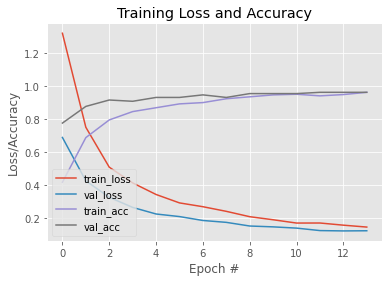

In [52]:

N = 50 #epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N),H.history["loss"],label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"],label='val_loss')
plt.plot(np.arange(0, N), H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")